In [1]:
#importing
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [2]:
#reading csv files and separating them into "buckets"
scores = pd.read_csv('/Users/cammybritts/Desktop/DEPRESSION DATASET/scores.csv', index_col=0)
print(scores)

condition_directory = ('/Users/cammybritts/Desktop/DEPRESSION DATASET/condition/*.csv')
condition_csv = glob.glob(condition_directory)
condition_df = []
for file in condition_csv:
    df_cond = pd.read_csv(file)
    df_cond['id'] = file.split('/')[-1].replace('.csv', '')
    condition_df.append(df_cond)
condition = pd.concat(condition_df, ignore_index=True)
condition.set_index('id', inplace=True)
print(condition)

control_directory = ('/Users/cammybritts/Desktop/DEPRESSION DATASET/control/*.csv')
control_csv = glob.glob(control_directory)
control_df=[]
for file in control_csv:
    df_con = pd.read_csv(file)
    df_con['id'] = file.split('/')[-1].replace('.csv', '')
    control_df.append(df_con)
control = pd.concat(control_df, ignore_index=True)
control.set_index('id', inplace=True)
print(control)

              days  gender    age  afftype  melanch  inpatient    edu  \
number                                                                  
condition_1     11       2  35-39      2.0      2.0        2.0   6-10   
condition_2     18       2  40-44      1.0      2.0        2.0   6-10   
condition_3     13       1  45-49      2.0      2.0        2.0   6-10   
condition_4     13       2  25-29      2.0      2.0        2.0  11-15   
condition_5     13       2  50-54      2.0      2.0        2.0  11-15   
condition_6      7       1  35-39      2.0      2.0        2.0   6-10   
condition_7     11       1  20-24      1.0      NaN        2.0  11-15   
condition_8      5       2  25-29      2.0      NaN        2.0  11-15   
condition_9     13       2  45-49      1.0      NaN        2.0   6-10   
condition_10     9       2  45-49      2.0      2.0        2.0   6-10   
condition_11    14       1  45-49      2.0      2.0        2.0   6-10   
condition_12    12       2  40-44      1.0      2.0

Data Cleansing

In [3]:
#data cleansing (not much to do?)
scores.fillna('')

,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
number,,,,,,,,,,,
condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
condition_7,11,1,20-24,1.0,,2.0,11-15,2.0,1.0,24.0,25.0
condition_8,5,2,25-29,2.0,,2.0,11-15,1.0,2.0,20.0,16.0
condition_9,13,2,45-49,1.0,,2.0,6-10,1.0,2.0,26.0,26.0


Condition vs. Scores

In [4]:
#filtering the data - filtered_scores_cond separates the condition group from control group in scores.csv
#afftype groups by afftype (1.0 - bipolar2 , 2.0 - unipolar, 3.0-bipolar1)
filtered_scores_cond = scores[scores.index.str.startswith('condition')]

afftype = filtered_scores_cond.groupby(filtered_scores_cond['afftype'])

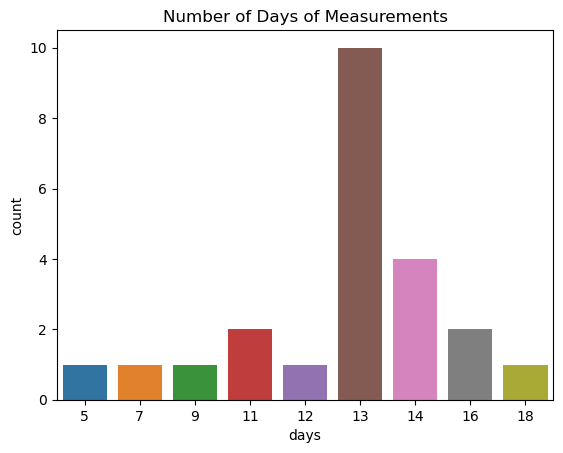

In [5]:
#condition group histogram of days spent being measured (for actigraph i believe)
sns.countplot(x='days', data=filtered_scores_cond)
plt.title('Number of Days of Measurements')
plt.show()

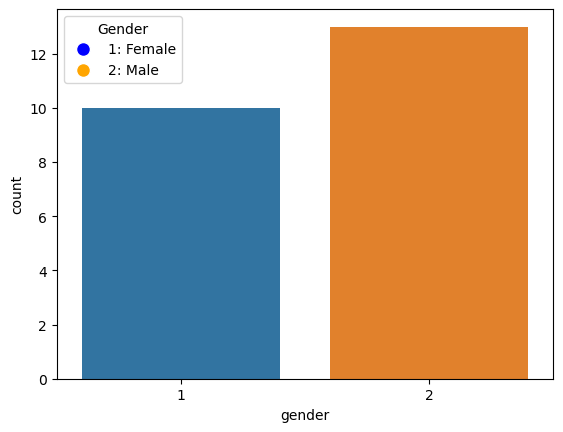

In [6]:
#overall gender distribution among condition group
ax = sns.countplot(x='gender', data=filtered_scores_cond)

handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='1: Female'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='2: Male')
]

ax.legend(handles=handles, title='Gender')

plt.show()

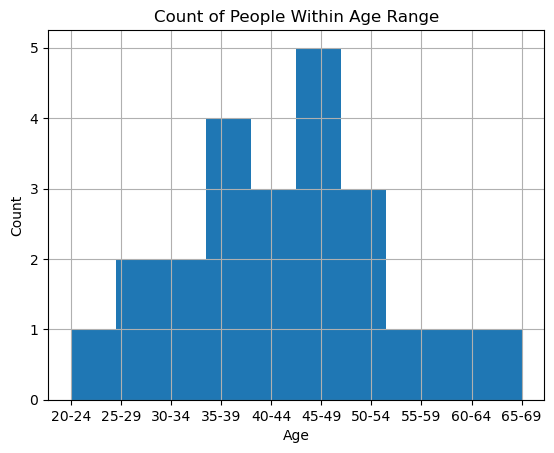

In [7]:
#condition group histogram of age (age was pre-separated into buckets, we don't know anyone's ACTUAL age at the time of testing)

sorted_scores_cond = filtered_scores_cond.sort_values(by='age')
sorted_scores_cond['age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of People Within Age Range')
plt.show()

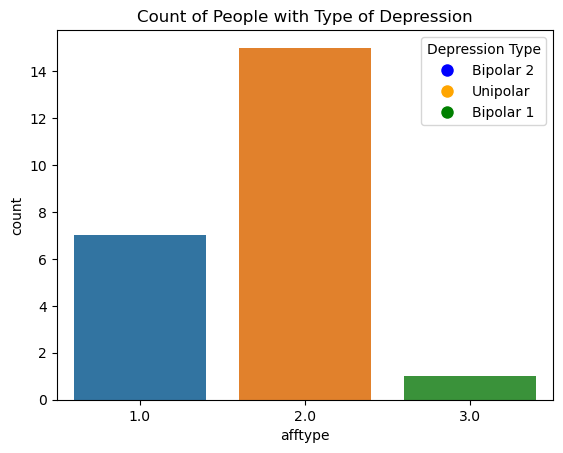

In [8]:
#distribution of type of depression in the condition group
ax = sns.countplot(x='afftype', data=filtered_scores_cond)

handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Bipolar 2'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Unipolar'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Bipolar 1')
]

plt.legend(handles=handles, title='Depression Type')
plt.title('Count of People with Type of Depression')

plt.show()

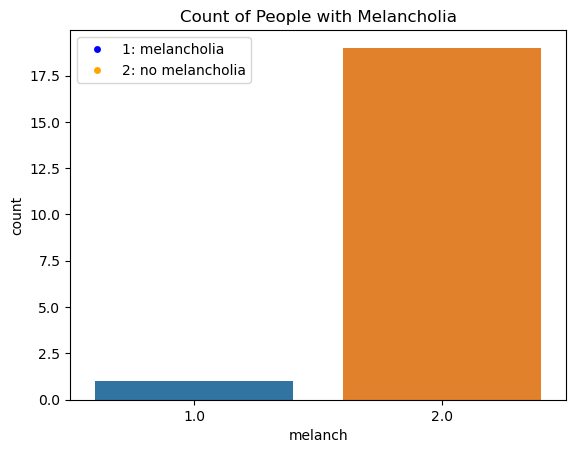

In [9]:
#condition group vs melancholia
ax = sns.countplot(x='melanch', data=filtered_scores_cond)

handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='1: melancholia'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', label='2: no melancholia')
]

ax.legend(handles=handles)
plt.title('Count of People with Melancholia')
plt.show()

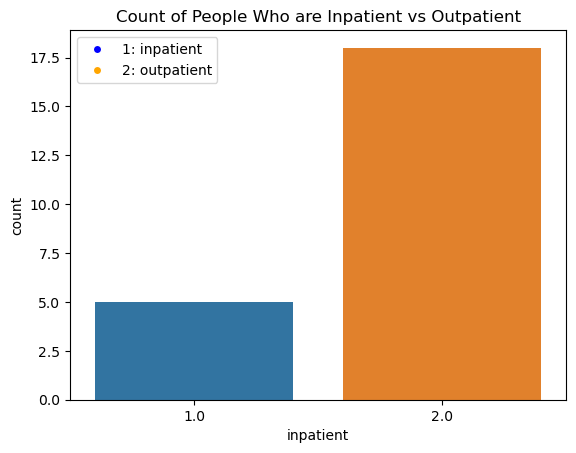

In [10]:
#condition group vs whether they are being treated inpatient or outpatient
ax = sns.countplot(x='inpatient', data=filtered_scores_cond)

handles = [
    plt.Line2D([0],[0], marker='o', color='w', markerfacecolor='blue', label='1: inpatient'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', label='2: outpatient')
]

ax.legend(handles=handles)
plt.title('Count of People Who are Inpatient vs Outpatient')
plt.show()

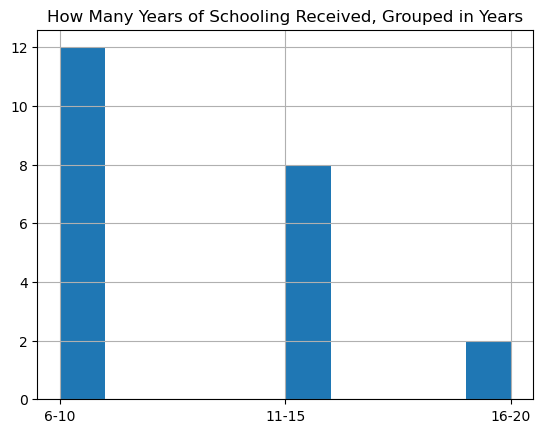

In [11]:
#how many years of schooling for overall condition group
dropeduna = filtered_scores_cond[filtered_scores_cond['edu'] != ' ']
dropeduna['edu'].hist()

plt.title('How Many Years of Schooling Received, Grouped in Years')
plt.show()

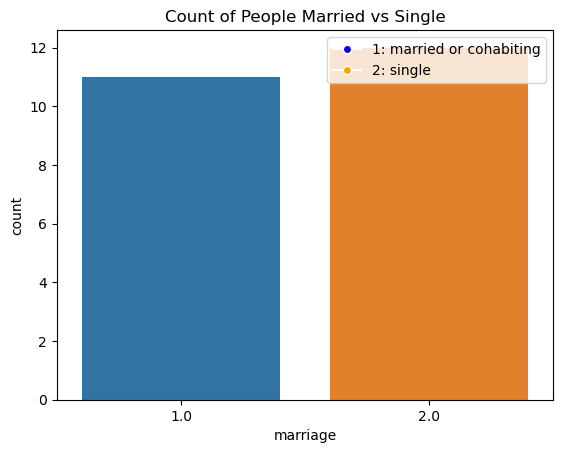

In [12]:
ax = sns.countplot(x='marriage', data=filtered_scores_cond)

handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='1: married or cohabiting'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', label='2: single')
]

ax.legend(handles=handles)
plt.title('Count of People Married vs Single')
plt.show()

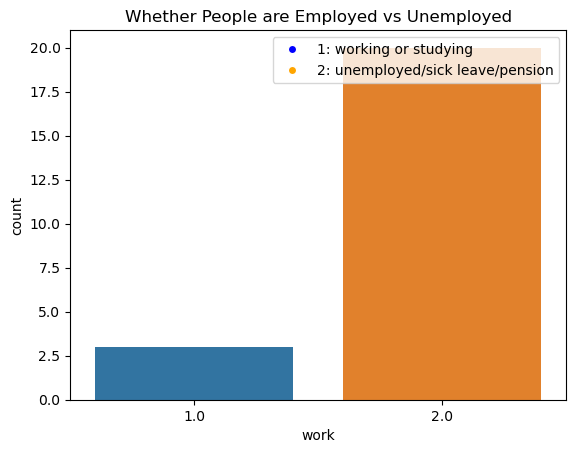

In [13]:
ax = sns.countplot(x='work', data=filtered_scores_cond)

handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='1: working or studying'),
    plt.Line2D([0],[0], marker='o', color='w', markerfacecolor='orange', label='2: unemployed/sick leave/pension')
]

ax.legend(handles=handles)
plt.title('Whether People are Employed vs Unemployed')
plt.show()

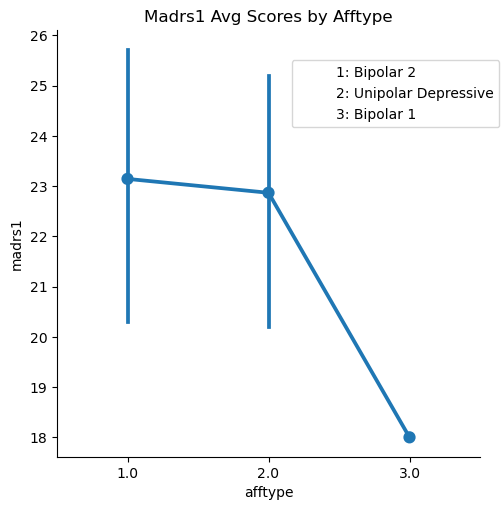

In [14]:
ax = sns.catplot(x='afftype', y='madrs1', data=filtered_scores_cond, kind='point')

handles=[
    plt.Line2D([0],[0], color='w', markerfacecolor='green', label='1: Bipolar 2'),
    plt.Line2D([0], [0], color='w', markerfacecolor='orange', label='2: Unipolar Depressive'),
    plt.Line2D([0],[0], color='w', markerfacecolor='pink', label='3: Bipolar 1')
]

ax.fig.legend(handles=handles, loc=(0.58, 0.75))
plt.title('Madrs1 Avg Scores by Afftype')

plt.savefig('madrs1avgscorebyafftype.png', dpi=300)

plt.show()

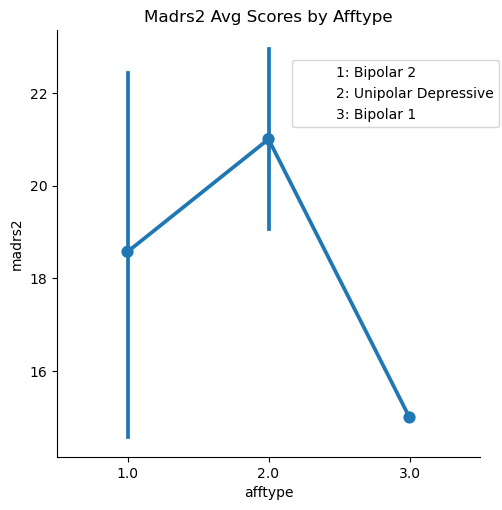

In [15]:
ax = sns.catplot(x='afftype', y='madrs2', data=filtered_scores_cond, kind='point')

handles=[
    plt.Line2D([0],[0], color='w', label='1: Bipolar 2'),
    plt.Line2D([0], [0], color='w', label='2: Unipolar Depressive'),
    plt.Line2D([0],[0], color='w', markerfacecolor='pink', label='3: Bipolar 1')
]

ax.fig.legend(handles=handles, loc=(0.58, 0.75))
plt.title('Madrs2 Avg Scores by Afftype')

plt.savefig('madrs2avgscoresbyafftype.png', dpi=300)
plt.show()

In [16]:
cond_description = filtered_scores_cond.describe()
print(cond_description)

            days     gender    afftype    melanch  inpatient   marriage  \
count  23.000000  23.000000  23.000000  20.000000  23.000000  23.000000   
mean   12.652174   1.565217   1.739130   1.950000   1.782609   1.521739   
std     2.773391   0.506870   0.540824   0.223607   0.421741   0.510754   
min     5.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
25%    12.500000   1.000000   1.000000   2.000000   2.000000   1.000000   
50%    13.000000   2.000000   2.000000   2.000000   2.000000   2.000000   
75%    14.000000   2.000000   2.000000   2.000000   2.000000   2.000000   
max    18.000000   2.000000   3.000000   2.000000   2.000000   2.000000   

            work     madrs1     madrs2  
count  23.000000  23.000000  23.000000  
mean    1.869565  22.739130  20.000000  
std     0.344350   4.797892   4.729021  
min     1.000000  13.000000  11.000000  
25%     2.000000  18.500000  16.000000  
50%     2.000000  24.000000  21.000000  
75%     2.000000  26.000000  24.50000

Unipolar Depression vs. Scores

In [17]:
bipolar2 = filtered_scores_cond[filtered_scores_cond['afftype'] == 1]

unipolar = filtered_scores_cond[filtered_scores_cond['afftype'] == 2]

bipolar1 = filtered_scores_cond[filtered_scores_cond['afftype'] == 3]

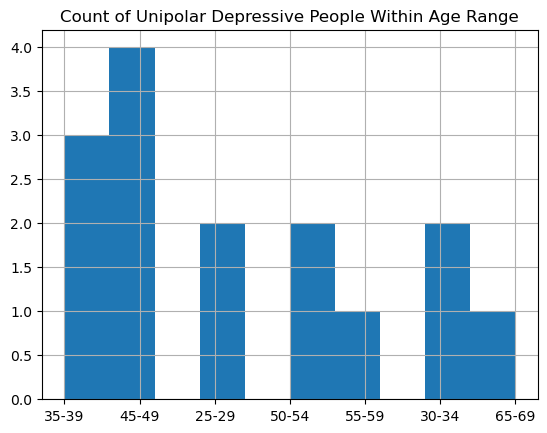

In [18]:
def age(df, name):
    df['age'].hist()
    plt.title(f'Count of {name} People Within Age Range')
    plt.show()

unipolar_age = [age(unipolar, 'Unipolar Depressive')]

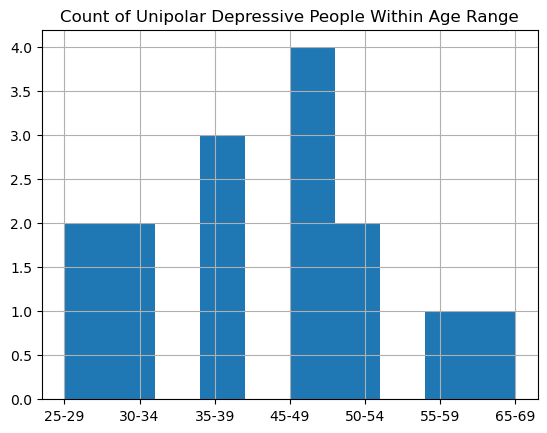

In [19]:
unipolar_sorted = unipolar.sort_values(by='age')

unipolar_sorted['age'].hist()

plt.title('Count of Unipolar Depressive People Within Age Range')

plt.savefig('agehistuni.png', dpi=400)

plt.show()

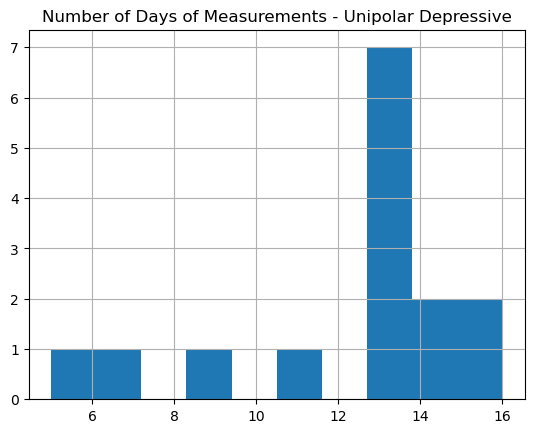

In [20]:
def days(df, name):
    df['days'].hist()
    plt.title(f'Number of Days of Measurements - {name}')
    plt.show()

unipolar_days = [days(unipolar, 'Unipolar Depressive')]

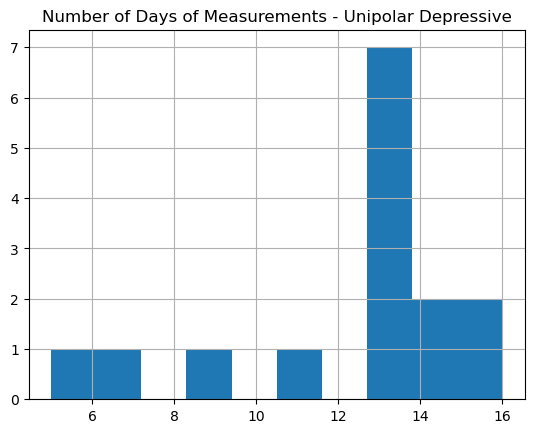

In [21]:
unipolar['days'].hist()

plt.title('Number of Days of Measurements - Unipolar Depressive')

plt.savefig('dayshistuni.png', dpi=400)

plt.show()

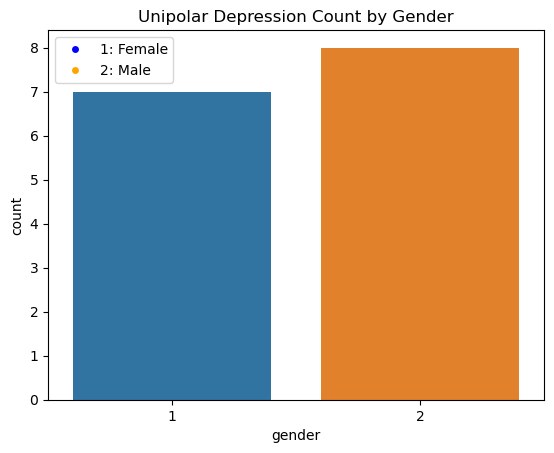

In [71]:
ax = sns.countplot(x='gender', data=unipolar)

handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='1: Female'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', label='2: Male')
]

ax.legend(handles=handles)

plt.title('Unipolar Depression Count by Gender')

plt.savefig('unipolargender.png', dpi=1000)

plt.show()

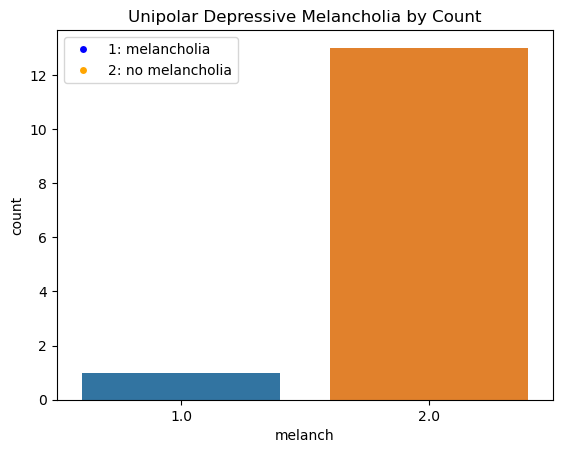

In [72]:
ax = sns.countplot(x='melanch', data=unipolar)

handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='1: melancholia'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', label='2: no melancholia')
]

ax.legend(handles=handles)

plt.title('Unipolar Depressive Melancholia by Count')

plt.savefig('unipolarmelancholia.png', dpi=1000)

plt.show()

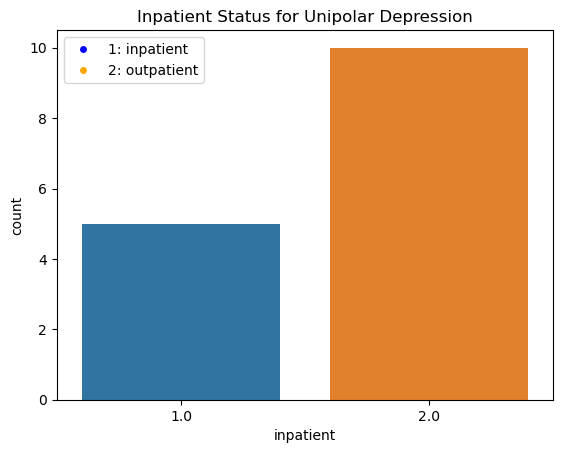

In [73]:
ax = sns.countplot(x='inpatient', data=unipolar)

handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='1: inpatient'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', label='2: outpatient')
]

ax.legend(handles=handles)

plt.title('Inpatient Status for Unipolar Depression')

plt.savefig('unipolarinpatient.png', dpi=1000)
plt.show()

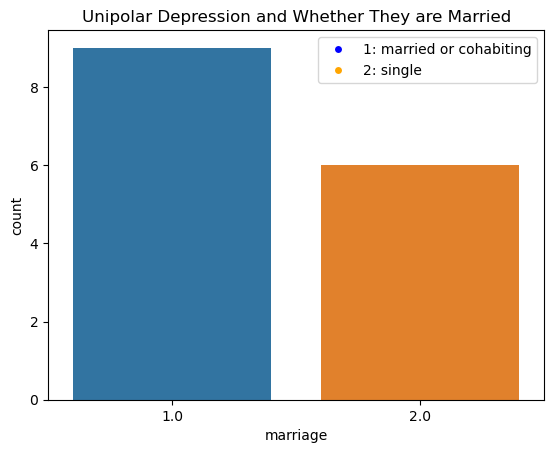

In [74]:
ax = sns.countplot(x='marriage', data=unipolar)

def afftype_handle(color, label):
    handle = plt.Line2D([0],[0], marker='o', color='w', markerfacecolor=color, label=label)
    return handle

handles = [afftype_handle('blue', '1: married or cohabiting'), afftype_handle('orange', '2: single')]

ax.legend(handles=handles, loc='upper right')
plt.title('Unipolar Depression and Whether They are Married')

plt.savefig('unipolarmarried.png', dpi=1000)

plt.show()

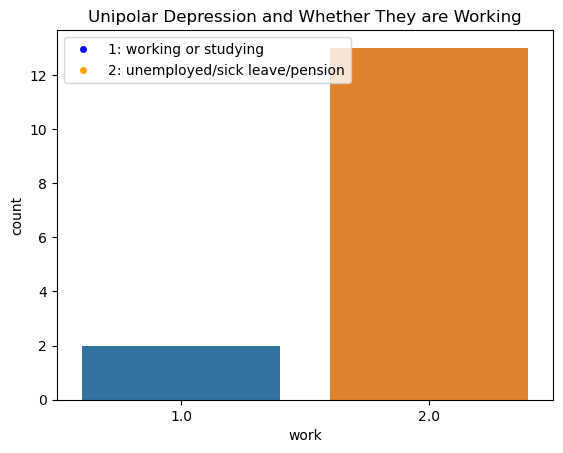

In [75]:
ax = sns.countplot(x='work', data=unipolar)

handles=[afftype_handle('blue', '1: working or studying'), afftype_handle('orange', '2: unemployed/sick leave/pension')]

ax.legend(handles=handles, loc='upper left')
plt.title('Unipolar Depression and Whether They are Working')

plt.savefig('unipolarwork.png', dpi=1000)
plt.show()

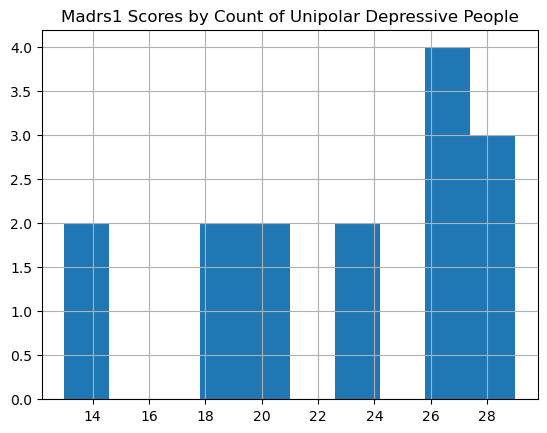

In [27]:
unipolar['madrs1'].hist()

plt.title('Madrs1 Scores by Count of Unipolar Depressive People')
plt.show()

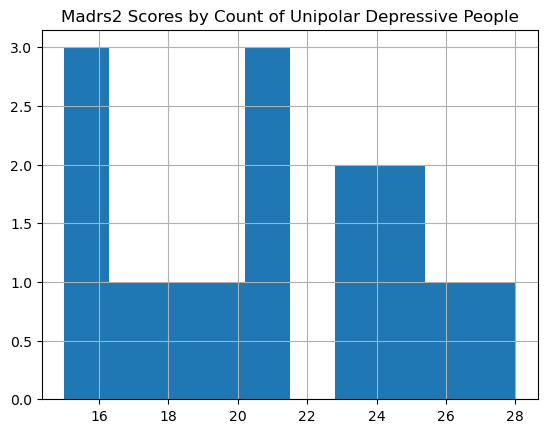

In [28]:
unipolar['madrs2'].hist()

plt.title('Madrs2 Scores by Count of Unipolar Depressive People')
plt.show()

Bipolar 1 vs. Scores

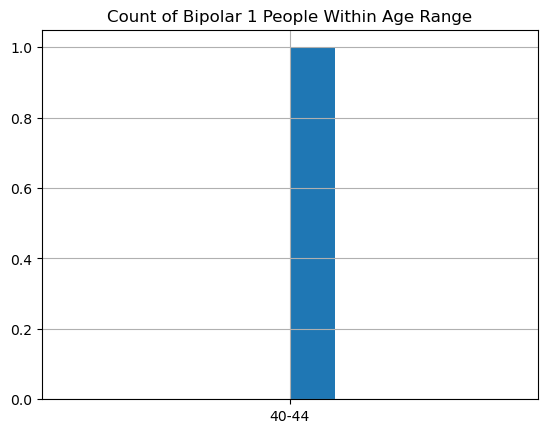

In [29]:
bipolar1['age'].hist()

plt.title('Count of Bipolar 1 People Within Age Range')
plt.savefig('bipolar1count.png', dpi=400)
plt.show()

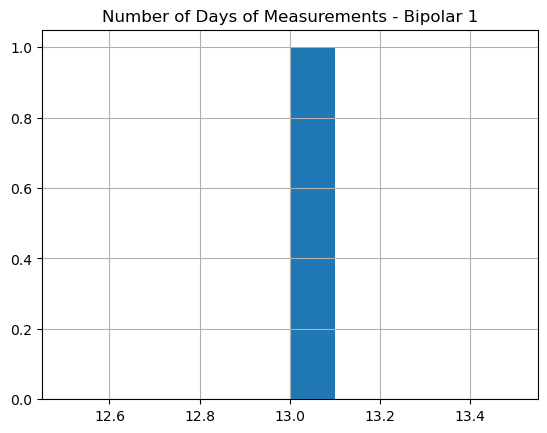

In [30]:
bipolar1['days'].hist()

plt.title('Number of Days of Measurements - Bipolar 1')

plt.savefig('numberdaysbi1.png', dpi=400)

plt.show()

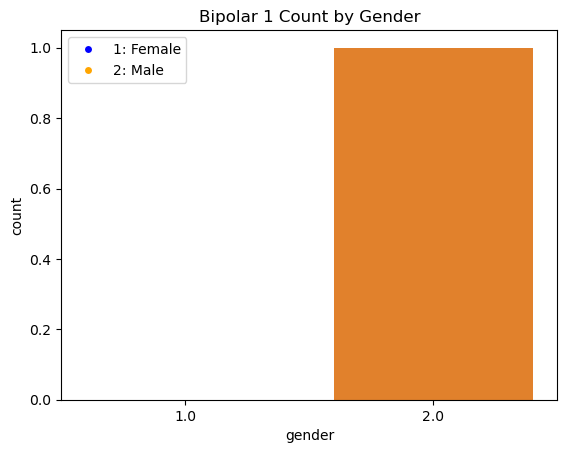

In [76]:
order = [1.0, 2.0]
ax = sns.countplot(x='gender', data=bipolar1, order=order)

handles = [afftype_handle('blue', '1: Female'), afftype_handle('orange', '2: Male')]

ax.legend(handles=handles, loc='upper left')

plt.title('Bipolar 1 Count by Gender')
plt.savefig('bipolar1gender.png', dpi=1000)
plt.show()

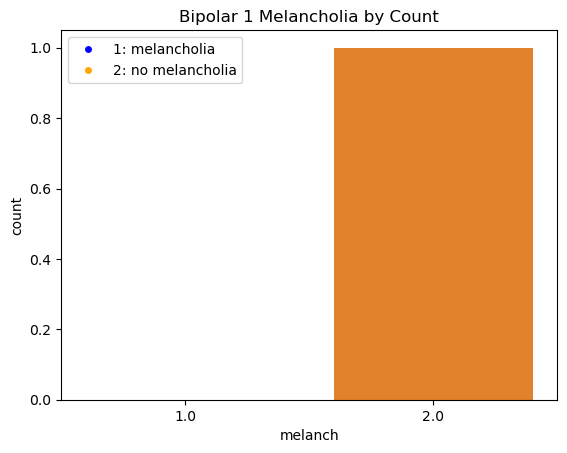

In [77]:
ax = sns.countplot(x='melanch', data=bipolar1, order=order)

handles = [afftype_handle('blue', '1: melancholia'), afftype_handle('orange', '2: no melancholia')]

ax.legend(handles=handles, loc='upper left')

plt.title('Bipolar 1 Melancholia by Count')
plt.savefig('bipolar1melancholia.png', dpi=1000)
plt.show()

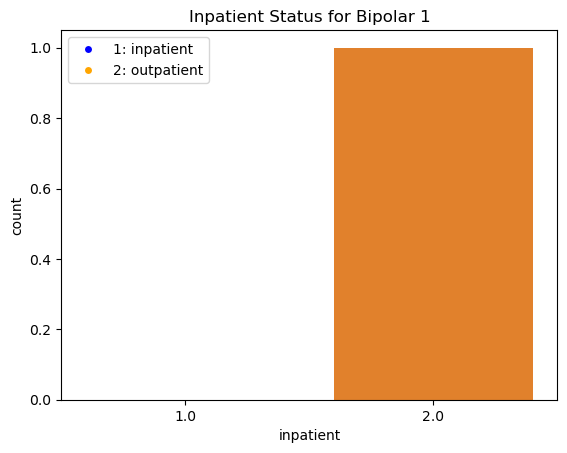

In [78]:
order=[1.0, 2.0]
ax = sns.countplot(x='inpatient', data=bipolar1, order=order)

handles = [afftype_handle('blue', '1: inpatient'), afftype_handle('orange', '2: outpatient')]

ax.legend(handles=handles, loc='upper left')

plt.title('Inpatient Status for Bipolar 1')
plt.savefig('bipolar1inpatient.png', dpi=1000)
plt.show()

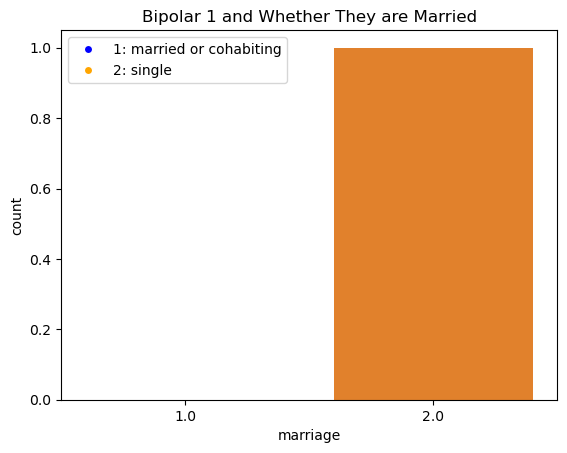

In [79]:
order=[1.0, 2.0]
ax = sns.countplot(x='marriage', data=bipolar1, order=order)

handles= [afftype_handle('blue', '1: married or cohabiting'), afftype_handle('orange', '2: single')]

ax.legend(handles=handles, loc='upper left')

plt.title('Bipolar 1 and Whether They are Married')
plt.savefig('bipolar1married.png', dpi=1000)
plt.show()

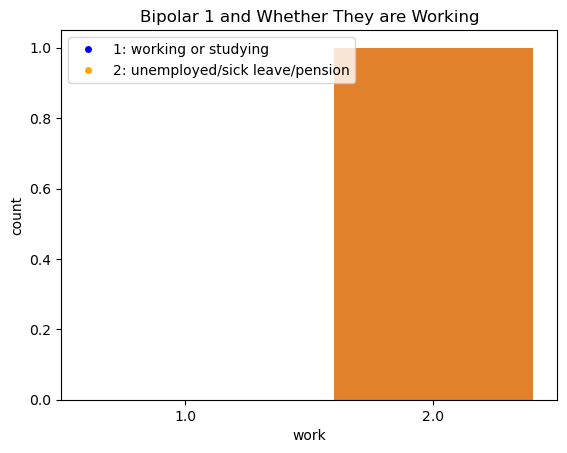

In [80]:
order=[1.0, 2.0]
ax = sns.countplot(x='work', data=bipolar1, order=order)

handles=[afftype_handle('blue', '1: working or studying'), afftype_handle('orange', '2: unemployed/sick leave/pension')]

ax.legend(handles=handles, loc='upper left')

plt.title('Bipolar 1 and Whether They are Working')
plt.savefig('bipolar1work.png', dpi=1000)
plt.show()

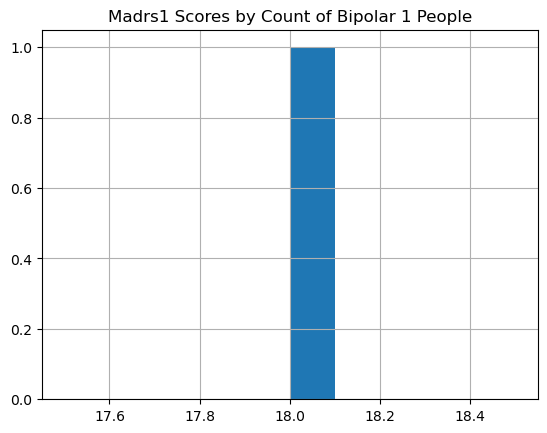

In [36]:
bipolar1['madrs1'].hist()

plt.title('Madrs1 Scores by Count of Bipolar 1 People')
plt.show()

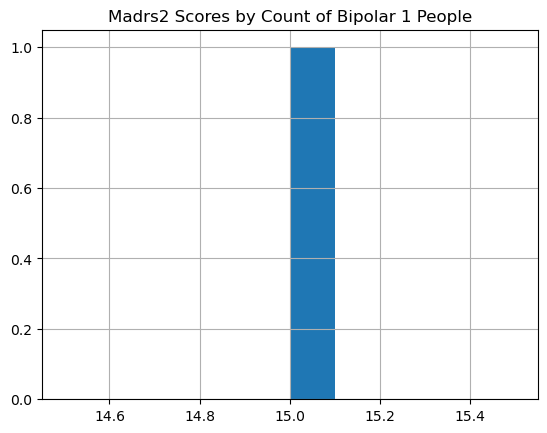

In [37]:
bipolar1['madrs2'].hist()

plt.title('Madrs2 Scores by Count of Bipolar 1 People')
plt.show()

Bipolar 2 vs. Scores

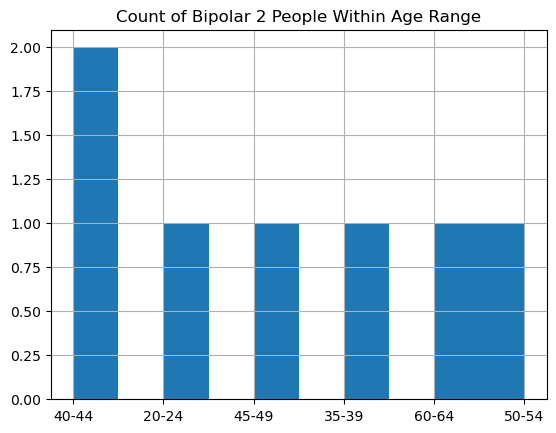

In [38]:
bipolar2_age = [age(bipolar2, 'Bipolar 2')]

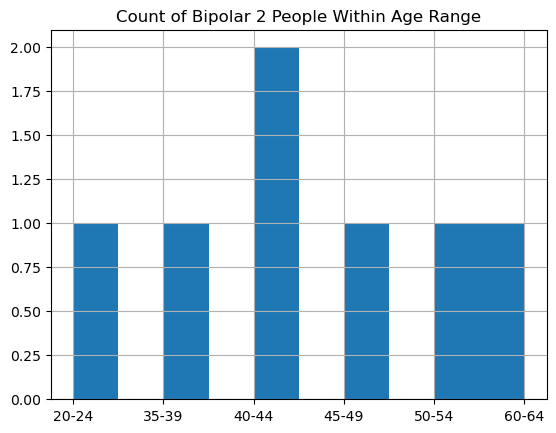

In [63]:
sorted_bipolar2 = bipolar2.sort_values(by='age')

sorted_bipolar2['age'].hist()
plt.title('Count of Bipolar 2 People Within Age Range')

plt.savefig('bipolar2count.png', dpi=1000)
plt.show()

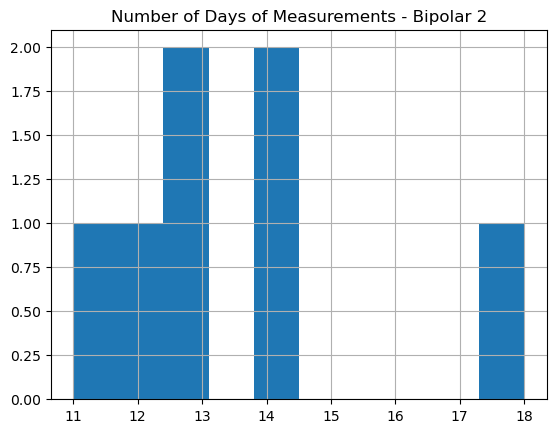

In [40]:
bipolar2_days = [days(bipolar2, 'Bipolar 2')]

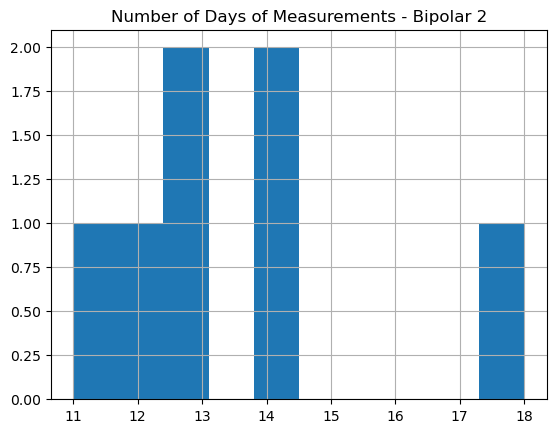

In [64]:
bipolar2['days'].hist()

plt.title('Number of Days of Measurements - Bipolar 2')

plt.savefig('bipolar2days.png', dpi=1000)

plt.show()

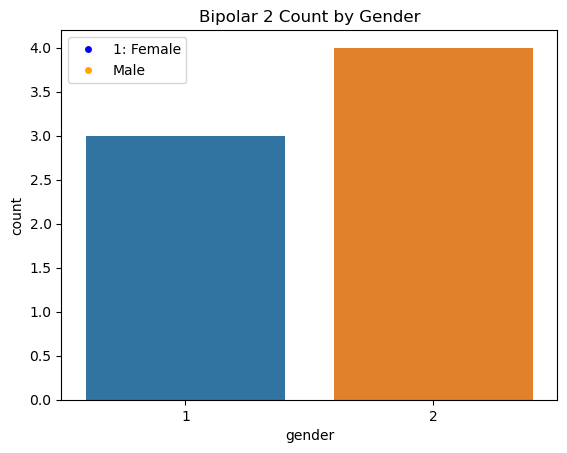

In [65]:
ax = sns.countplot(x='gender', data=bipolar2)

handles = [afftype_handle('blue', '1: Female'), afftype_handle('orange', 'Male')]

ax.legend(handles=handles, loc='upper left')

plt.title('Bipolar 2 Count by Gender')

plt.savefig('bipolar2gender.png', dpi=1000)
plt.show()

In [43]:
def countplot(x, data):
    ax = sns.countplot(x=x, data=data)

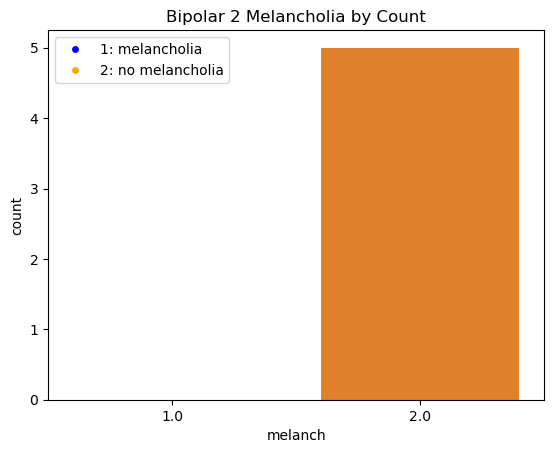

In [66]:
order=[1.0, 2.0]

ax = sns.countplot(x='melanch', data=bipolar2, order = order)

handles = [afftype_handle('blue', '1: melancholia'), afftype_handle('orange', '2: no melancholia')]

ax.legend(handles=handles, loc='upper left')

plt.title('Bipolar 2 Melancholia by Count')
plt.savefig('bipolar2melancholia.png', dpi=1000)
plt.show()

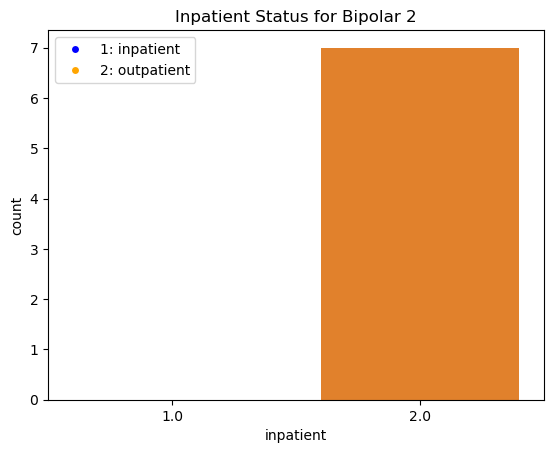

In [68]:
order=[1.0, 2.0]

ax = sns.countplot(x='inpatient', data=bipolar2, order=order)

handles = [afftype_handle('blue', '1: inpatient'), afftype_handle('orange', '2: outpatient')]

ax.legend(handles=handles, loc='upper left')

plt.title('Inpatient Status for Bipolar 2')
plt.savefig('bipolar2inpatient.png', dpi=1000)
plt.show()

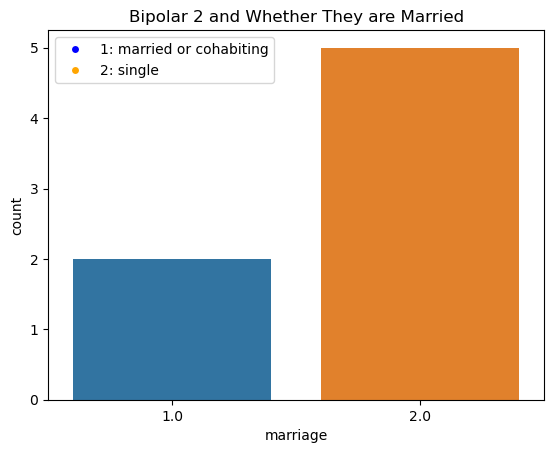

In [69]:
ax = sns.countplot(x='marriage', data=bipolar2)

handles = [afftype_handle('blue', '1: married or cohabiting'), afftype_handle('orange', '2: single')]

ax.legend(handles=handles, loc='upper left')

plt.title('Bipolar 2 and Whether They are Married')
plt.savefig('bipolar2married.png', dpi=1000)
plt.show()

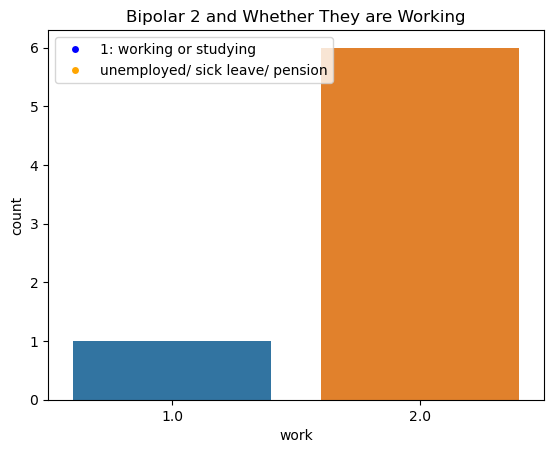

In [70]:
ax = sns.countplot(x='work', data=bipolar2)

handles = [afftype_handle('blue', '1: working or studying'), afftype_handle('orange', 'unemployed/ sick leave/ pension')]

ax.legend(handles=handles, loc='upper left')

plt.title('Bipolar 2 and Whether They are Working')
plt.savefig('bipolar2work.png', dpi=1000)
plt.show()

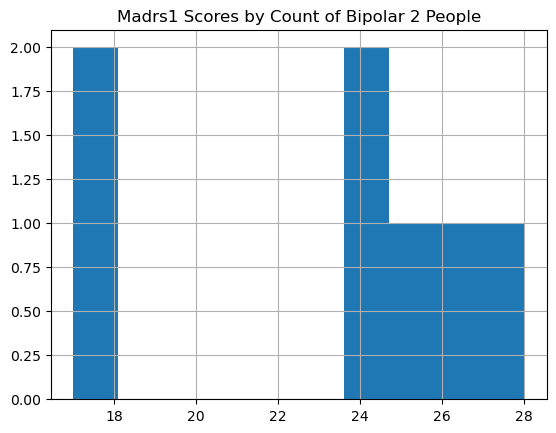

In [48]:
bipolar2['madrs1'].hist()

plt.title('Madrs1 Scores by Count of Bipolar 2 People')
plt.show()

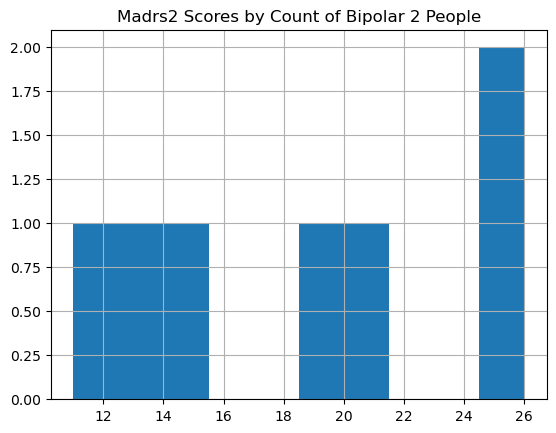

In [49]:
bipolar2['madrs2'].hist()

plt.title('Madrs2 Scores by Count of Bipolar 2 People')
plt.show()

Condition vs. Actigraph

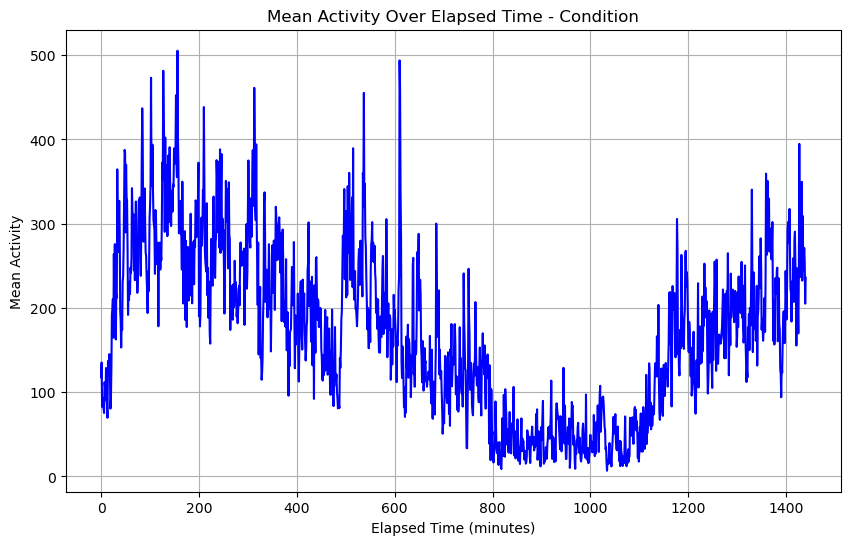

In [82]:
condition_df = pd.DataFrame(condition)

condition_df.reset_index(inplace=True)

condition_df['timestamp'] = pd.to_datetime(condition_df['timestamp'], format='mixed')

condition_df['elapsed_time'] = condition_df.groupby('id')['timestamp'].transform(lambda x: (x - x.min()).dt.total_seconds() / 60)

condition_df.set_index('timestamp', inplace=True)

condition_df.drop(columns=['date'], inplace=True)

filtered_condition = condition_df[condition_df['elapsed_time'] < 1441]

elapse_group = filtered_condition.groupby('elapsed_time')['activity'].mean()

plt.figure(figsize=(10, 6))
plt.plot(elapse_group.index, elapse_group.values, linestyle='-', color='b')
plt.title('Mean Activity Over Elapsed Time - Condition')
plt.xlabel('Elapsed Time (minutes)')
plt.ylabel('Mean Activity')
plt.grid(True)
plt.savefig('meanacticond.png', dpi=1000)
plt.show()

Control vs. Scores

In [51]:
filtered_scores_cont = scores[scores.index.str.startswith('control')]

print(filtered_scores_cont)

            days  gender    age  afftype  melanch  inpatient  edu  marriage  \
number                                                                        
control_1      8       2  25-29      NaN      NaN        NaN  NaN       NaN   
control_2     20       1  30-34      NaN      NaN        NaN            NaN   
control_3     12       2  30-34      NaN      NaN        NaN            NaN   
control_4     13       1  25-29      NaN      NaN        NaN            NaN   
control_5     13       1  30-34      NaN      NaN        NaN            NaN   
control_6     13       1  25-29      NaN      NaN        NaN            NaN   
control_7     13       1  20-24      NaN      NaN        NaN            NaN   
control_8     13       2  40-44      NaN      NaN        NaN            NaN   
control_9     13       2  30-34      NaN      NaN        NaN            NaN   
control_10     8       1  30-34      NaN      NaN        NaN            NaN   
control_11    13       1  45-49      NaN      NaN   

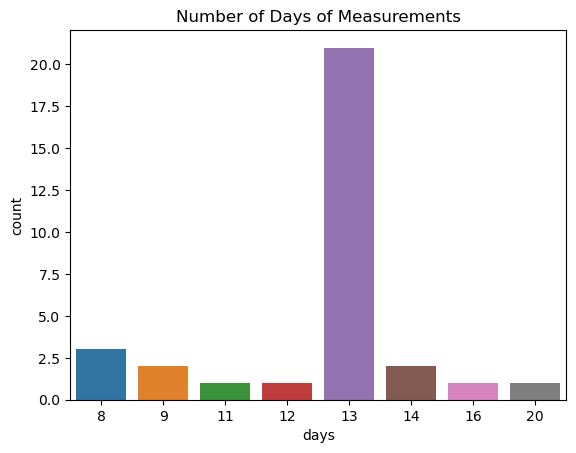

In [52]:
#control group histogram of days spent being measured (for actigraph i believe)
sns.countplot(x='days', data=filtered_scores_cont)
plt.title('Number of Days of Measurements')
plt.show()

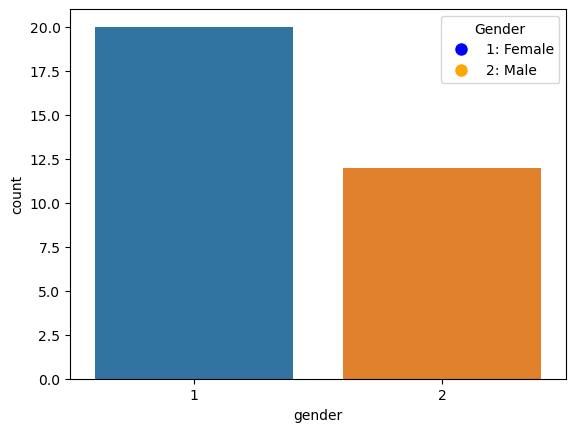

In [53]:
#overall gender distribution among control group
ax = sns.countplot(x='gender', data=filtered_scores_cont)

handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='1: Female'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='2: Male')
]

ax.legend(handles=handles, title='Gender')

plt.show()

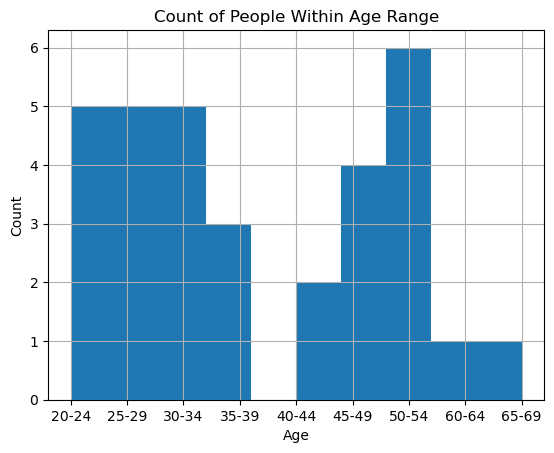

In [54]:
#control group histogram of age (age was pre-separated into buckets, we don't know anyone's ACTUAL age at the time of testing)
cont_sorted = filtered_scores_cont.sort_values(by='age')

cont_sorted['age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of People Within Age Range')
plt.show()

Control vs. Actigraph

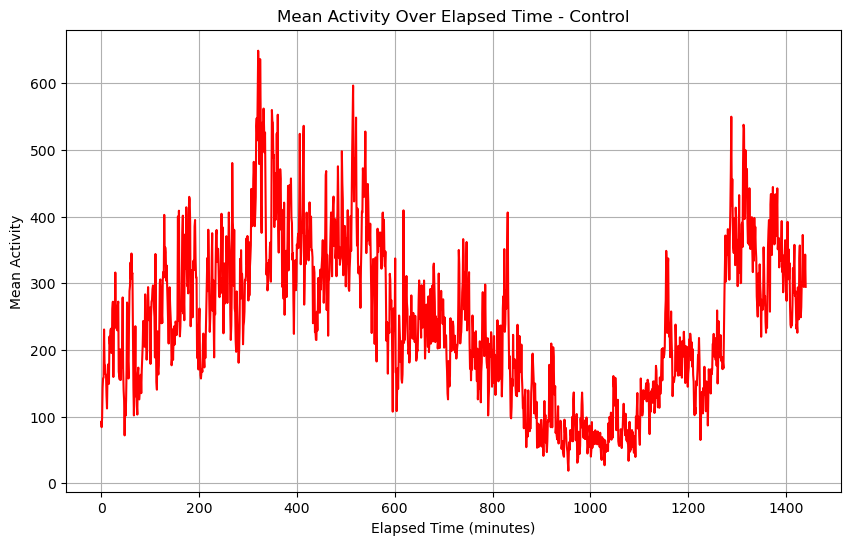

In [83]:
control_df = pd.DataFrame(control)

control_df.reset_index(inplace=True)

control_df['timestamp'] = pd.to_datetime(control_df['timestamp'])

control_df['elapsed_time'] = control_df.groupby('id')['timestamp'].transform(lambda x: (x - x.min()).dt.total_seconds() / 60)

control_df.set_index('timestamp', inplace=True)

control_df.drop(columns=['date'], inplace=True)

filtered_control = control_df[control_df['elapsed_time'] < 1441]

elapse_group_control = filtered_control.groupby('elapsed_time')['activity'].mean()

plt.figure(figsize=(10, 6))
plt.plot(elapse_group_control.index, elapse_group_control.values, linestyle='-', color='r')
plt.title('Mean Activity Over Elapsed Time - Control')
plt.xlabel('Elapsed Time (minutes)')
plt.ylabel('Mean Activity')
plt.grid(True)
plt.savefig('meanacticont.png', dpi=1000)
plt.show()

Compare Condition vs. Control with Scores

In [56]:
filtered_scores_cont = scores[scores.index.str.startswith('control')]

filtered_scores_cond = scores[scores.index.str.startswith('condition')]

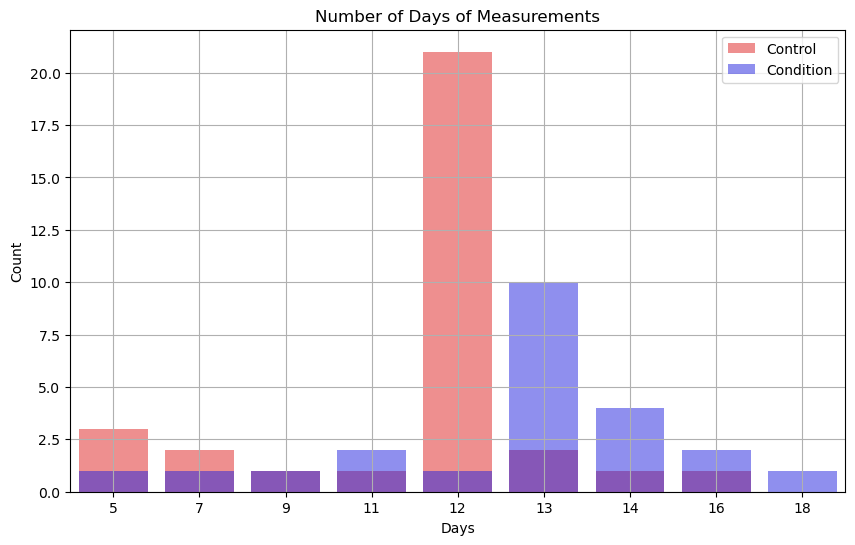

In [57]:
#control vs condition for number of days of measurements

fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(x='days', data=filtered_scores_cont, palette=['red'], ax=ax, alpha=0.5, label='Control')

sns.countplot(x='days', data=filtered_scores_cond, palette=['blue'], ax=ax, alpha=0.5, label='Condition')

plt.title('Number of Days of Measurements')
plt.xlabel('Days')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

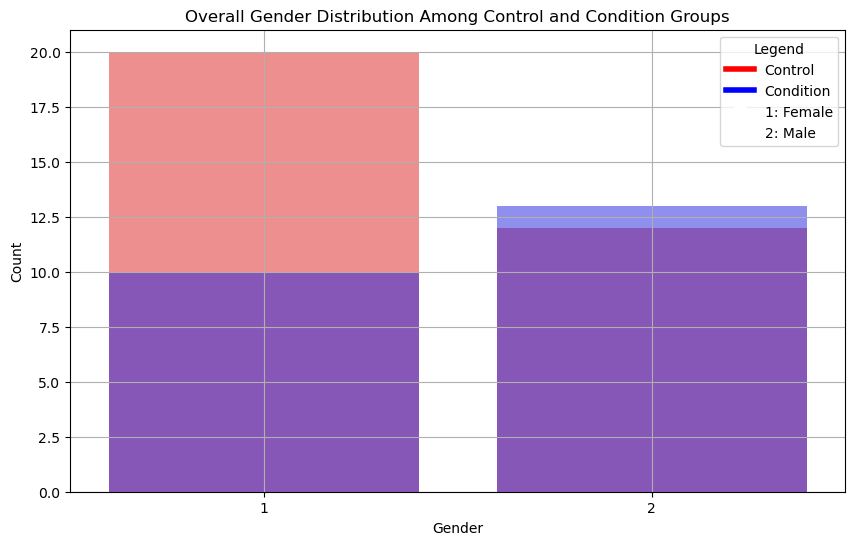

In [58]:
#overall gender distribution among control vs condition group
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(x='gender', data=filtered_scores_cont, palette=['red'], ax=ax, alpha=0.5, label='Control')
sns.countplot(x='gender', data=filtered_scores_cond, palette=['blue'], ax=ax, alpha=0.5, label='Condition')

handles = [
    plt.Line2D([0], [0], color='red', lw=4, label='Control'),
    plt.Line2D([0], [0], color='blue', lw=4, label='Condition'),
    plt.Line2D([0], [0], marker='o', color='w', markersize=10, label='1: Female'),
    plt.Line2D([0], [0], marker='o', color='w', markersize=10, label='2: Male')
]


ax.legend(handles=handles, title='Legend')

plt.title('Overall Gender Distribution Among Control and Condition Groups')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

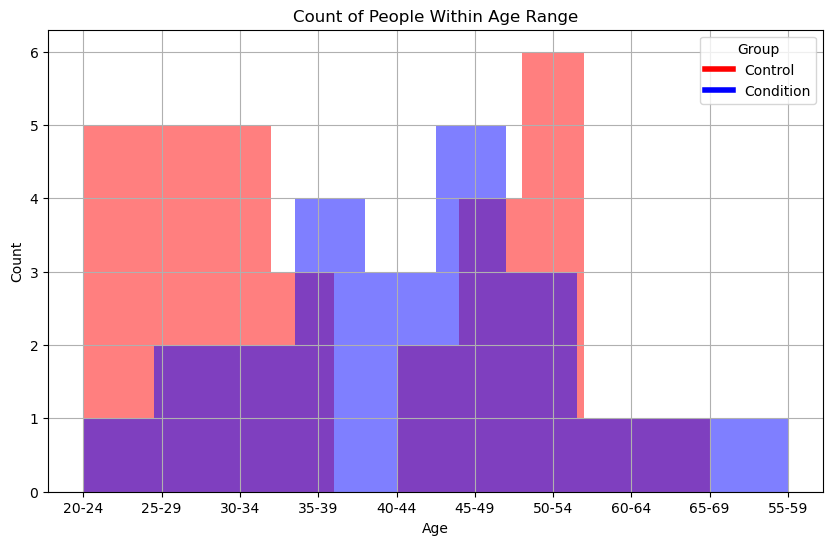

In [59]:
#control vs condition group histogram of age
fig, ax = plt.subplots(figsize=(10,6))

cont_sorted['age'].hist(alpha=0.5, color='red')
sorted_scores_cond['age'].hist(alpha=0.5, color='blue')

handles = [
    plt.Line2D([0],[0], color='red', lw=4, label='Control'),
    plt.Line2D([0], [0], color='blue', lw=4, label='Condition')
]

ax.legend(handles=handles, title='Group')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of People Within Age Range')
plt.show()

Compare Condition vs. Control with Actigraph

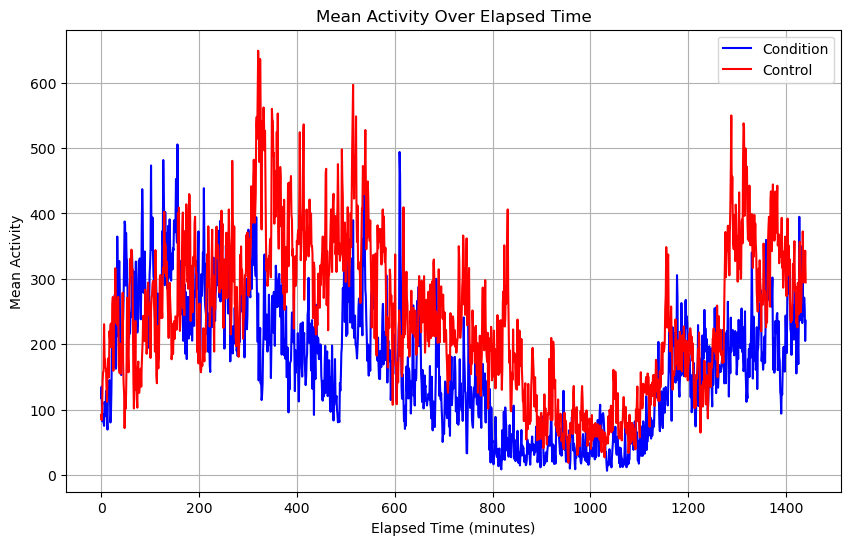

In [84]:
condition_df = pd.DataFrame(condition)
condition_df.reset_index(inplace=True)
condition_df['timestamp'] = pd.to_datetime(condition_df['timestamp'], format='mixed')
condition_df['elapsed_time'] = condition_df.groupby('id')['timestamp'].transform(lambda x: (x - x.min()).dt.total_seconds() / 60)
condition_df.set_index('timestamp', inplace=True)
condition_df.drop(columns=['date'], inplace=True)
filtered_condition = condition_df[condition_df['elapsed_time'] < 1441]
elapse_group_condition = filtered_condition.groupby('elapsed_time')['activity'].mean()

control_df = pd.DataFrame(control)
control_df.reset_index(inplace=True)
control_df['timestamp'] = pd.to_datetime(control_df['timestamp'], format='mixed')
control_df['elapsed_time'] = control_df.groupby('id')['timestamp'].transform(lambda x: (x - x.min()).dt.total_seconds() / 60)
control_df.set_index('timestamp', inplace=True)
control_df.drop(columns=['date'], inplace=True)
filtered_control = control_df[control_df['elapsed_time'] < 1441]
elapse_group_control = filtered_control.groupby('elapsed_time')['activity'].mean()

plt.figure(figsize=(10, 6))
plt.plot(elapse_group_condition.index, elapse_group_condition.values, linestyle='-', color='b', label='Condition')
plt.plot(elapse_group_control.index, elapse_group_control.values, linestyle='-', color='r', label='Control')
plt.title('Mean Activity Over Elapsed Time')
plt.xlabel('Elapsed Time (minutes)')
plt.ylabel('Mean Activity')
plt.legend()
plt.grid(True)
plt.savefig('meanactiboth.png', dpi=1000)
plt.show()

# Insights

In [61]:
#most condition people spent 13 days there
#most condition people are gender 2 (i think male?)
#most condition people are younger
#most condition people have type 2 (unipolar depressive)
#almost all condition people do not experience melancholia - extreme depression, failure to take pleasure in activities
#most condition people are outpatient
#marriage does not seem to effect depression (equal married vs. not married)
#most condition people are not working (unemployed/sick leave/pension)
#afftype 3(bipolar) had noticeably lower madrs1 and madrs2 scores; afftype2(unipolar) had noticeably higher madrs2 scores 
#most condition people had less schooling